### Regularized logistic regression

In [1]:
##================ Part 0: Reading data and plotting ==================#

import pandas as pd
import numpy as np

data = pd.read_csv('ex2data2.txt')
X = np.vstack([data.x1,data.x2]).T
y = data.y

import matplotlib.pyplot as plt
import plot_utils

print 'Plotting data with green circle indicating (y=1) examples and red circle indicating (y=0) examples ...'
plot_utils.plot_twoclass_data(X,y,'Chip Test 1', 'Chip Test 2',['y=0','y=1'])
plt.show()
#plt.savefig('fig3.pdf')

Plotting data with green circle indicating (y=1) examples and red circle indicating (y=0) examples ...


Optimization terminated successfully.
         Current function value: 0.529003
         Iterations: 47
         Function evaluations: 48
         Gradient evaluations: 48
Theta found by fmin_bfgs:  [ 1.27268739  0.62557016  1.1809665  -2.01919822 -0.91761468 -1.43194199
  0.12375921 -0.36513086 -0.35703388 -0.17485805 -1.45843772 -0.05129676
 -0.61603963 -0.2746414  -1.19282569 -0.24270336 -0.20570022 -0.04499768
 -0.27782709 -0.29525851 -0.45613294 -1.04377851  0.02762813 -0.29265642
  0.01543393 -0.32759318 -0.14389199 -0.92460119]
Final loss =  0.4624583499


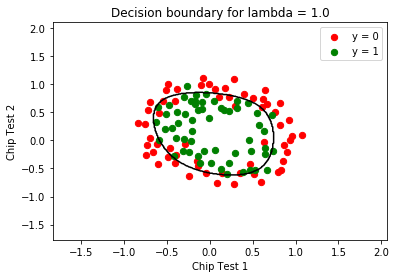

In [2]:
#================ Part 1: Compute cost and gradient ==================#
# open logistic_regressor.py and implement the regularized loss function 
# and gradient 

# map the features in ex2data2.txt into a pth order polynomial

import sklearn
from sklearn.preprocessing import PolynomialFeatures

# Map X onto polynomial features and normalize

p = 6
poly = sklearn.preprocessing.PolynomialFeatures(degree=p,include_bias=False)
X_poly = poly.fit_transform(X)

# set up the data matrix (expanded basis functions) with the column of ones as intercept

XX = np.vstack([np.ones((X_poly.shape[0],)),X_poly.T]).T

# set up a regularized logistic regression model

from logistic_regressor import RegLogisticRegressor

reg_lr1 = RegLogisticRegressor()

# run fmin on the loss function and gradient 

reg = 1.0
theta_opt = reg_lr1.train(XX,y,reg=reg,num_iters=1000,norm=False)

# print the theta found and the final loss

print 'Theta found by fmin_bfgs: ',theta_opt
print "Final loss = ", reg_lr1.loss(theta_opt,XX,y,0.0)

# plot the decision boundary

plot_utils.plot_decision_boundary_poly(X,y,theta_opt,reg,p,'Chip Test 1', 'Chip Test 2',['y = 0','y = 1'])
plt.show()
#plt.savefig('fig4.pdf')

In [3]:
# compute accuracy on training set
# implement the predict method in logistic_regressor.py

reg_lr1.theta = theta_opt
predy = reg_lr1.predict(XX)

# TODO: fill in the expression for accuracy of prediction
accuracy = np.mean(predy == y)
print "Accuracy on the training set = ", accuracy

Accuracy on the training set =  0.830508474576


Optimization terminated successfully.
         Current function value: 0.224569
         Iterations: 546
         Function evaluations: 547
         Gradient evaluations: 547
Theta found by fmin_bfgs:  [   35.10190105    44.11914163    69.27184725  -344.27896654  -198.23458542
  -184.22836355  -295.82030968  -621.73248146  -510.84910551  -328.31165326
  1094.70007231  1269.58566242  1757.74861867   900.93764982   436.58871413
   471.12019237  1236.23832691  1822.81967046  1929.6666574   1131.05249173
   463.79898202 -1142.11712221 -2020.95881875 -3463.39894405 -3484.50956605
 -3252.26628513 -1546.00867801  -510.41244042]
Final loss =  0.224568733762


utils.py:17: RuntimeWarning: overflow encountered in exp
  sig = 1 / (1 + np.exp(-z))


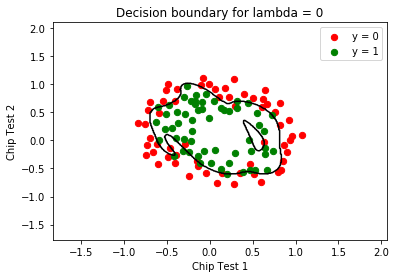

Optimization terminated successfully.
         Current function value: 0.686484
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Theta found by fmin_bfgs:  [ 0.02188603 -0.01748169  0.00571031 -0.0551694  -0.01314888 -0.03859919
 -0.01846356 -0.00773236 -0.00892434 -0.02280491 -0.04343876 -0.00235623
 -0.01415631 -0.00349509 -0.04143634 -0.02100597 -0.00471924 -0.00359133
 -0.00632236 -0.00502443 -0.03197706 -0.03416353 -0.00107628 -0.00702623
 -0.00038506 -0.0079824  -0.00154778 -0.04108711]
Final loss =  0.680380702148


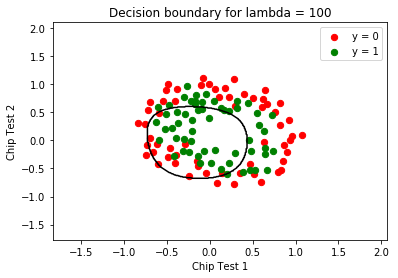

In [4]:
regs = [0, 100]
reg_lr2 = RegLogisticRegressor()
for reg in regs:
    theta_opt2 = reg_lr2.train(XX, y, reg = reg, num_iters = 1000, norm = False)
    print 'Theta found by fmin_bfgs: ', theta_opt2
    print "Final loss = ", reg_lr2.loss(theta_opt2, XX, y, 0.0)

    # plot the decision boundary
    plot_utils.plot_decision_boundary_poly(X, y, theta_opt2, reg, p,'Chip Test 1', 'Chip Test 2',['y = 0','y = 1'])
    plt.show()

### Comparing learned model with sklearn's logistic ridge regression

Theta found by sklearn with L2 reg:  [ 1.1421394   0.60141117  1.16712554 -1.87160974 -0.91574144 -1.26966693
  0.12658629 -0.3686536  -0.34511687 -0.17368655 -1.42387465 -0.04870064
 -0.60646669 -0.26935562 -1.16303832 -0.24327026 -0.20702143 -0.04326335
 -0.28028058 -0.286921   -0.46908732 -1.03633961  0.02914775 -0.29263743
  0.01728096 -0.32898422 -0.13801971 -0.93196832]
Loss with sklearn theta:  0.46843403006


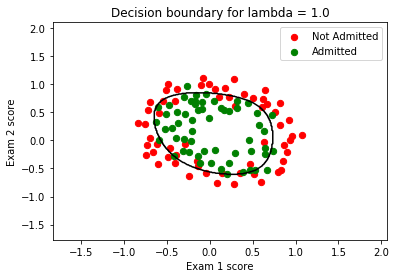

In [5]:
# Compare with model learned by sklearn's logistic regression with reg = 1/C
# the regularization parameter set below can be varied (on a logarithmic scale)

reg = 1.0

# L2 regularization with sklearn LogisticRegression

from sklearn import linear_model
sk_logreg_l2 = linear_model.LogisticRegression(C=1.0/reg,solver='lbfgs',fit_intercept=False)
sk_logreg_l2.fit(XX,y)
print "Theta found by sklearn with L2 reg: ", sk_logreg_l2.coef_[0]
print "Loss with sklearn theta: ", reg_lr1.loss(sk_logreg_l2.coef_[0],XX,y,0.0)

plot_utils.plot_decision_boundary_sklearn_poly(X,y,sk_logreg_l2,reg,p,'Exam 1 score', 'Exam 2 score',['Not Admitted','Admitted'])
plt.show()
#plt.savefig('fig4_sk.pdf')


### L1 regularized logistic regre

Theta found by sklearn with L1 reg:  [ 1.87009255  0.68675344  1.28051731 -4.86295748 -1.62198085 -2.34486749
  0.          0.          0.          0.          0.          0.          0.
  0.         -2.36502954  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.        ]
Loss with sklearn theta:  0.438134840435
Computing regularization path ...


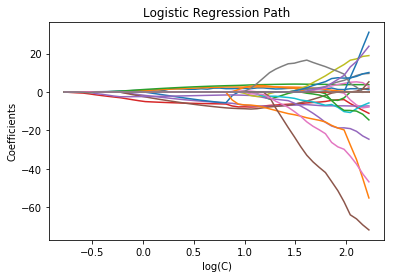

In [6]:
# L1 regularization witk sklearn LogisticRegression

sk_logreg_l1 = linear_model.LogisticRegression(C=1.0/reg,solver='liblinear',fit_intercept=False,penalty='l1')
sk_logreg_l1.fit(XX,y)
print "Theta found by sklearn with L1 reg: ", sk_logreg_l1.coef_[0]
print "Loss with sklearn theta: ", reg_lr1.loss(sk_logreg_l1.coef_[0],XX,y,0.0)

# plot regularization paths for L1 regression
# Exploration of L1 regularization 
# 
plot_utils.plot_regularization_path(XX,y)
plt.show()
#plt.savefig('fig5.pdf')

Theta found by sklearn with L2 reg:  [ 3.74522253  2.0107989   4.61214155 -5.45414606 -6.67189659 -5.94010197
  2.151067   -0.10213815  2.45921341 -2.5147764  -3.80255072  2.98381388
 -3.77718734 -1.96294588 -6.31923347 -1.71938626 -0.86707608  4.99914053
 -3.62305722 -4.32524672  2.8515795  -5.47204508  0.45198499 -0.88342842
  3.20815872 -4.5010269  -3.62599862  0.26743958]
Loss with sklearn theta:  0.316699562017


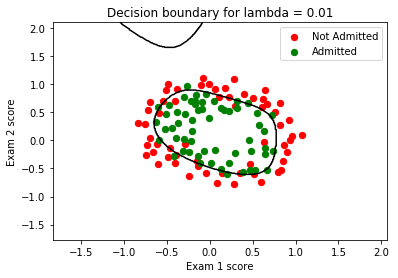

Theta found by sklearn with L2 reg:  [ 2.65855183  1.76427994  2.91364412 -4.03385629 -3.34849756 -4.0181188
  0.76777199 -1.08648166 -0.47195071 -0.4774888  -3.27598952  0.54686285
 -1.80180787 -1.17932445 -2.79104067 -0.62127841 -0.4711418   0.61454641
 -1.14697992 -1.20796935 -0.10569617 -2.66246949  0.45857402 -0.76144039
  0.43744164 -1.17502213 -0.93753591 -1.20049576]
Loss with sklearn theta:  0.353830932899


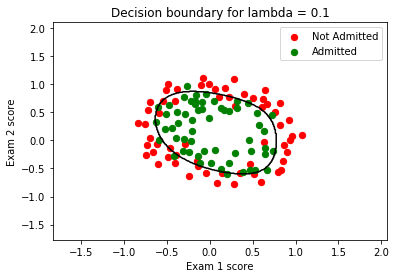

Theta found by sklearn with L2 reg:  [ 1.1421394   0.60141117  1.16712554 -1.87160974 -0.91574144 -1.26966693
  0.12658629 -0.3686536  -0.34511687 -0.17368655 -1.42387465 -0.04870064
 -0.60646669 -0.26935562 -1.16303832 -0.24327026 -0.20702143 -0.04326335
 -0.28028058 -0.286921   -0.46908732 -1.03633961  0.02914775 -0.29263743
  0.01728096 -0.32898422 -0.13801971 -0.93196832]
Loss with sklearn theta:  0.46843403006


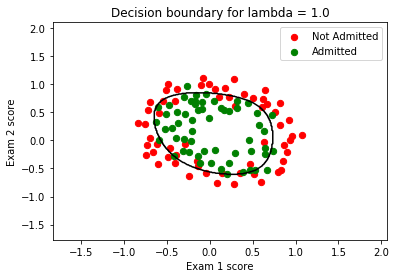

Theta found by sklearn with L2 reg:  [ 0.21469236 -0.00761966  0.17611687 -0.4012903  -0.11745553 -0.23188083
 -0.06668596 -0.05584267 -0.06215384 -0.09710193 -0.31766892 -0.01468057
 -0.10913398 -0.03014551 -0.26764027 -0.11186999 -0.03627398 -0.02114738
 -0.04753651 -0.04038118 -0.18117647 -0.24308692 -0.00364108 -0.05525352
 -0.00101451 -0.06094026 -0.01293964 -0.26287463]
Loss with sklearn theta:  0.621592068026


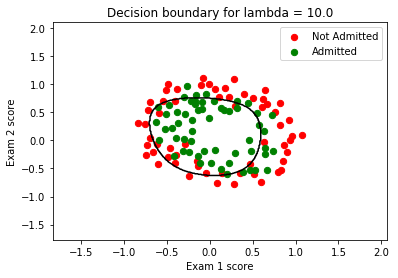

Theta found by sklearn with L2 reg:  [ 0.00468635 -0.01726848  0.0064196  -0.05402665 -0.01327551 -0.03727145
 -0.01821195 -0.00761037 -0.00885306 -0.02224573 -0.04288369 -0.00238585
 -0.01393196 -0.00354828 -0.04072376 -0.02078577 -0.00467203 -0.00354978
 -0.00624894 -0.00500393 -0.03153159 -0.03381515 -0.00108319 -0.00694192
 -0.0003945  -0.00788595 -0.00157683 -0.04058858]
Loss with sklearn theta:  0.68061702032


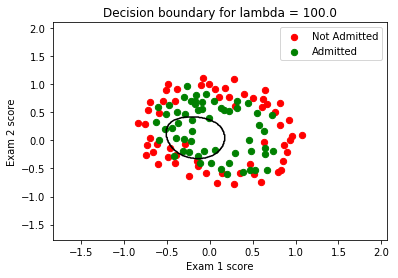

Theta found by sklearn with L1 reg:  [  3.12895467   0.2787718    3.81865685  -3.86104065  -7.20362952   0.
   4.73205956   6.26074719  15.38904363   0.           0.           0.
  -2.76746002   0.         -18.39739918   0.          -0.49047108
   8.91795085   0.         -12.4053181    6.96412621 -20.22719571
 -10.41426955   0.           8.9006786  -59.03067282 -29.10285719   0.        ]
Loss with sklearn theta:  0.29108348579


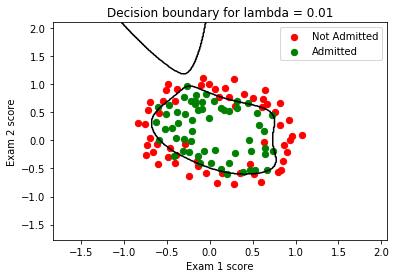

Theta found by sklearn with L1 reg:  [ 4.0024135   2.56771322  3.56322356 -7.68452344 -6.81223544 -8.66406067
  0.59050112 -0.20132422  0.          0.          0.          2.44650638
  0.          0.         -1.7036846   0.          0.          0.36453734
 -0.66807673  0.          0.         -6.71949358  0.          0.          0.
  0.         -0.05897889  0.        ]
Loss with sklearn theta:  0.336437124326


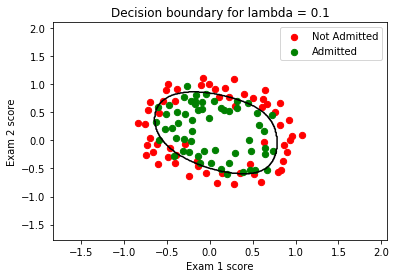

Theta found by sklearn with L1 reg:  [ 1.87007887  0.68675645  1.28052494 -4.86294147 -1.6220145  -2.3448717   0.
  0.          0.          0.          0.          0.          0.          0.
 -2.3650021   0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.        ]
Loss with sklearn theta:  0.438134913448


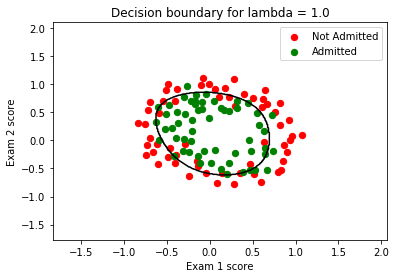

Theta found by sklearn with L1 reg:  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
Loss with sklearn theta:  0.69314718056


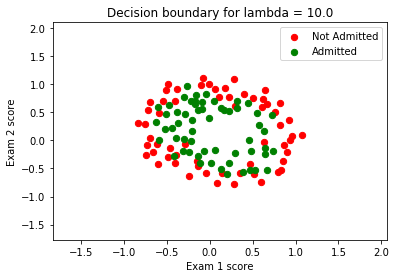

Theta found by sklearn with L1 reg:  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
Loss with sklearn theta:  0.69314718056


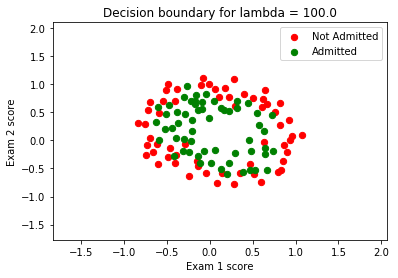

Computing regularization path ...


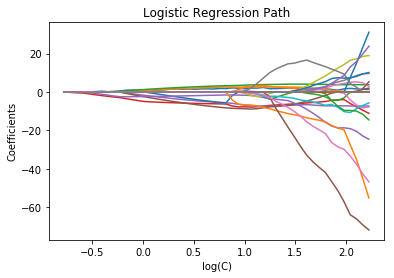

In [7]:
## Problem 3B4: Exploring L1 and L2 penalized logistic regression
regs = [0.01, 0.1, 1.0, 10.0, 100.0]

# L2 regularization with sklearn LogisticRegression
from sklearn import linear_model
reg_lr = RegLogisticRegressor()

for reg in regs:
    sk_logreg_l2 = linear_model.LogisticRegression(C = 1.0/reg, solver = 'lbfgs', fit_intercept = False)
    sk_logreg_l2.fit(XX,y)
    print "Theta found by sklearn with L2 reg: ", sk_logreg_l2.coef_[0]
    print "Loss with sklearn theta: ", reg_lr.loss(sk_logreg_l2.coef_[0], XX, y, 0.0)

    plot_utils.plot_decision_boundary_sklearn_poly(X, y, sk_logreg_l2, reg, p, 'Exam 1 score', 'Exam 2 score', ['Not Admitted', 'Admitted'])
    plt.show()

# L1 regularization with sklearn LogisticRegression
for reg in regs:
    sk_logreg_l1 = linear_model.LogisticRegression(C = 1.0/reg, solver='liblinear', fit_intercept = False, penalty = 'l1')
    sk_logreg_l1.fit(XX,y)
    print "Theta found by sklearn with L1 reg: ", sk_logreg_l1.coef_[0]
    print "Loss with sklearn theta: ", reg_lr.loss(sk_logreg_l1.coef_[0], XX, y, 0.0)

    plot_utils.plot_decision_boundary_sklearn_poly(X, y, sk_logreg_l1, reg, p, 'Exam 1 score', 'Exam 2 score', ['Not Admitted', 'Admitted'])
    plt.show()

plot_utils.plot_regularization_path(XX, y)
plt.show()

## Description
As λ increases from 0.01 to 100, the model switch from overfitting to underfitting, regardless the penalization is L1 or L2. We can see from the plots above, the loss function increases from 0.3 to approximate 0.7 along the increasing of regularization.
The regression path diagram shows the number of non-zero coefficients decrease when λ increase with L1 regularization. In general, more non-zero coefficients represent more complicated model which has higher opportunity to be overfitted.